# **Raw KMeans Clustering**

In [1]:
import numpy as np
import random

In [2]:
class KMeans:
    def __init__(self,n_clusters:int,max_iter=100,random_state = 42):
        self.K = n_clusters
        self.max_iter = max_iter
        self.centers = []
        self.label = []
        self.seed = random_state
    def get_distance(self,x,y):
        return np.sqrt(((x-y)**2).sum())
    def get_label(self,X):
        self.label = []
        for i,x in enumerate(X):
            distance_to = []
            for center in self.centers:
                distance_to.append(self.get_distance(x,center))
            self.label.append(distance_to.index(min(distance_to)))
    def fit(self,X):
        random.seed(self.seed)
        X = np.array(X)
        lenX = len(X)
        for i in range(self.K):
            self.centers.append(X[random.randint(0,lenX-1)])
        self.get_label(X)
        
        for i in range(self.max_iter):
            new_centers = []
            for i in range(self.K):
                members = np.array([x for idx,x in enumerate(X) if self.label[idx]==i])
                if len(members):
                    new_centers.append(members.mean(axis=0))
                else: new_centers.append(X[random.randint(0,lenX-1)])
            if np.allclose(self.centers,new_centers):
                break
            self.centers = new_centers
            self.get_label(X)
    def labels_(self):
        return np.array(self.label)
    def cluster_centers_(self):
        return np.array(self.centers)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd 
X, y = make_blobs(n_samples=300, centers=4, cluster_std=2, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
centers = kmeans.cluster_centers_()
y_pred = pd.Series(kmeans.labels_())
y_true = pd.Series(y)
print(y_pred.value_counts())
print(y_true.value_counts())

2    77
1    75
0    75
3    73
Name: count, dtype: int64
3    75
0    75
2    75
1    75
Name: count, dtype: int64


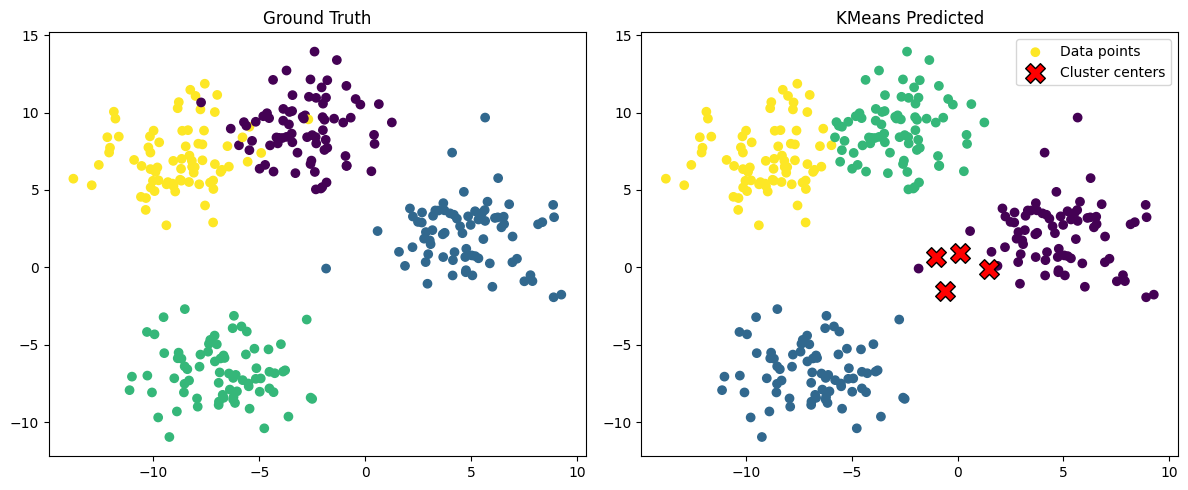

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',label='Data points')
axes[0].set_title("Ground Truth")

axes[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis',label='Data points')
axes[1].scatter(centers[:,0],centers[:,1],c='red',marker='X',s=200,edgecolor='k',label='Cluster centers')
axes[1].set_title("KMeans Predicted")

plt.legend()
plt.tight_layout()
plt.show()